In [25]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('../data/raw/train_data.csv')

train_data.head(15)

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
5,61946,1993,644,10,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
6,84070,1993,644,3,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
7,83185,1992,644,13,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
8,168141,1986,1377,4,terraced,central_heating,management_in_trust,713.0,0.0,0~5min,10min~15min,8.0,27.0,Kyungbuk_uni_hospital,4,9.0,6.0
9,153982,1986,914,11,terraced,central_heating,management_in_trust,713.0,0.0,0~5min,10min~15min,8.0,27.0,Kyungbuk_uni_hospital,4,9.0,6.0


### Checking for empty values

In [26]:
train_data.isnull().sum()

SalePrice                    0
YearBuilt                    0
Size(sqf)                    0
Floor                        0
HallwayType                  0
HeatingType                  0
AptManageType                0
N_Parkinglot(Ground)         0
N_Parkinglot(Basement)       0
TimeToBusStop                0
TimeToSubway                 0
N_manager                    0
N_elevators                  0
SubwayStation                0
N_FacilitiesInApt            0
N_FacilitiesNearBy(Total)    0
N_SchoolNearBy(Total)        0
dtype: int64

## Analysis of Categorical Variables:

In [27]:
def transform_price_to_class(price):
    if price <= 100000:
        return 0
    elif price <= 350000:
        return 1
    else:
        return 2

train_data['PriceClass'] = train_data['SalePrice'].apply(transform_price_to_class)
print(train_data['PriceClass'].value_counts(normalize=True) * 100)

PriceClass
1    72.550921
2    13.821532
0    13.627546
Name: proportion, dtype: float64


In [28]:
def transform_categorical_to_numeric(df, column):
    df_copy = df.copy()
    categories = df_copy[column].unique()
    category_mapping = {cat: i for i, cat in enumerate(categories)}
    df_copy[column + '_encoded'] = df_copy[column].map(category_mapping)
    return df_copy, category_mapping

def calculate_mutual_info(df, column, target):
    from sklearn.feature_selection import mutual_info_classif
    mi_value = mutual_info_classif(
        df[[column + '_encoded']], 
        df[target],
        discrete_features=True
    )[0]
    return mi_value

def analyze_categorical_features(df, target):
    import pandas as pd
    
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    results = []
    
    for col in categorical_columns:
        df_encoded, _ = transform_categorical_to_numeric(df, col)
        mi = calculate_mutual_info(df_encoded, col, target)
        distribution = df[col].value_counts(normalize=True) * 100
        n_categories = len(distribution)
        max_category = distribution.index[0]
        max_percent = distribution.iloc[0]
        
        results.append({
            'column': col,
            'mutual_info': mi,
            'n_categories': n_categories,
            'top_category': max_category,
            'top_category_percent': max_percent
        })
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('mutual_info', ascending=False)
    
    return results_df

In [29]:
analyze_categorical_features(train_data, 'PriceClass')

,column,mutual_info,n_categories,top_category,top_category_percent
0,HallwayType,0.210295,3,terraced,60.257032
4,TimeToSubway,0.155253,5,0-5min,47.526673
5,SubwayStation,0.133572,8,Kyungbuk_uni_hospital,27.279340
3,TimeToBusStop,0.039663,3,0~5min,76.333657
2,AptManageType,0.018396,2,management_in_trust,93.816683
1,HeatingType,0.011738,2,individual_heating,95.489816


In [30]:
def plot_categorical_distributions(df):
   import matplotlib.pyplot as plt
   import pandas as pd
   
   categorical_columns = df.select_dtypes(include=['object', 'category']).columns
   n_cols = len(categorical_columns)
   
   n_rows = (n_cols + 2) // 3
   
   fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4 * n_rows))
   axes = axes.flatten() if n_cols > 3 else [axes]
   
   results = []
   
   for i, col in enumerate(categorical_columns):
       if i < len(axes):
           value_counts = df[col].value_counts().sort_values(ascending=False)
           value_percent = df[col].value_counts(normalize=True).sort_values(ascending=False) * 100
           
           bars = axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
           axes[i].set_title(f'Value Distribution: {col}')
           axes[i].set_ylabel('Count')
           axes[i].tick_params(axis='x', rotation=45)
           
           for j, (bar, percent) in enumerate(zip(bars, value_percent.values)):
               height = bar.get_height()
               axes[i].text(bar.get_x() + bar.get_width()/2.,
                       height + 5,
                       f'{percent:.1f}%',
                       ha="center")
           
           for val, count, percent in zip(value_counts.index, value_counts.values, value_percent.values):
               results.append({
                   'column': col,
                   'value': val,
                   'count': count,
                   'percent': percent
               })
   
   for j in range(i + 1, len(axes)):
       axes[j].set_visible(False)
   
   plt.tight_layout()
   plt.show()

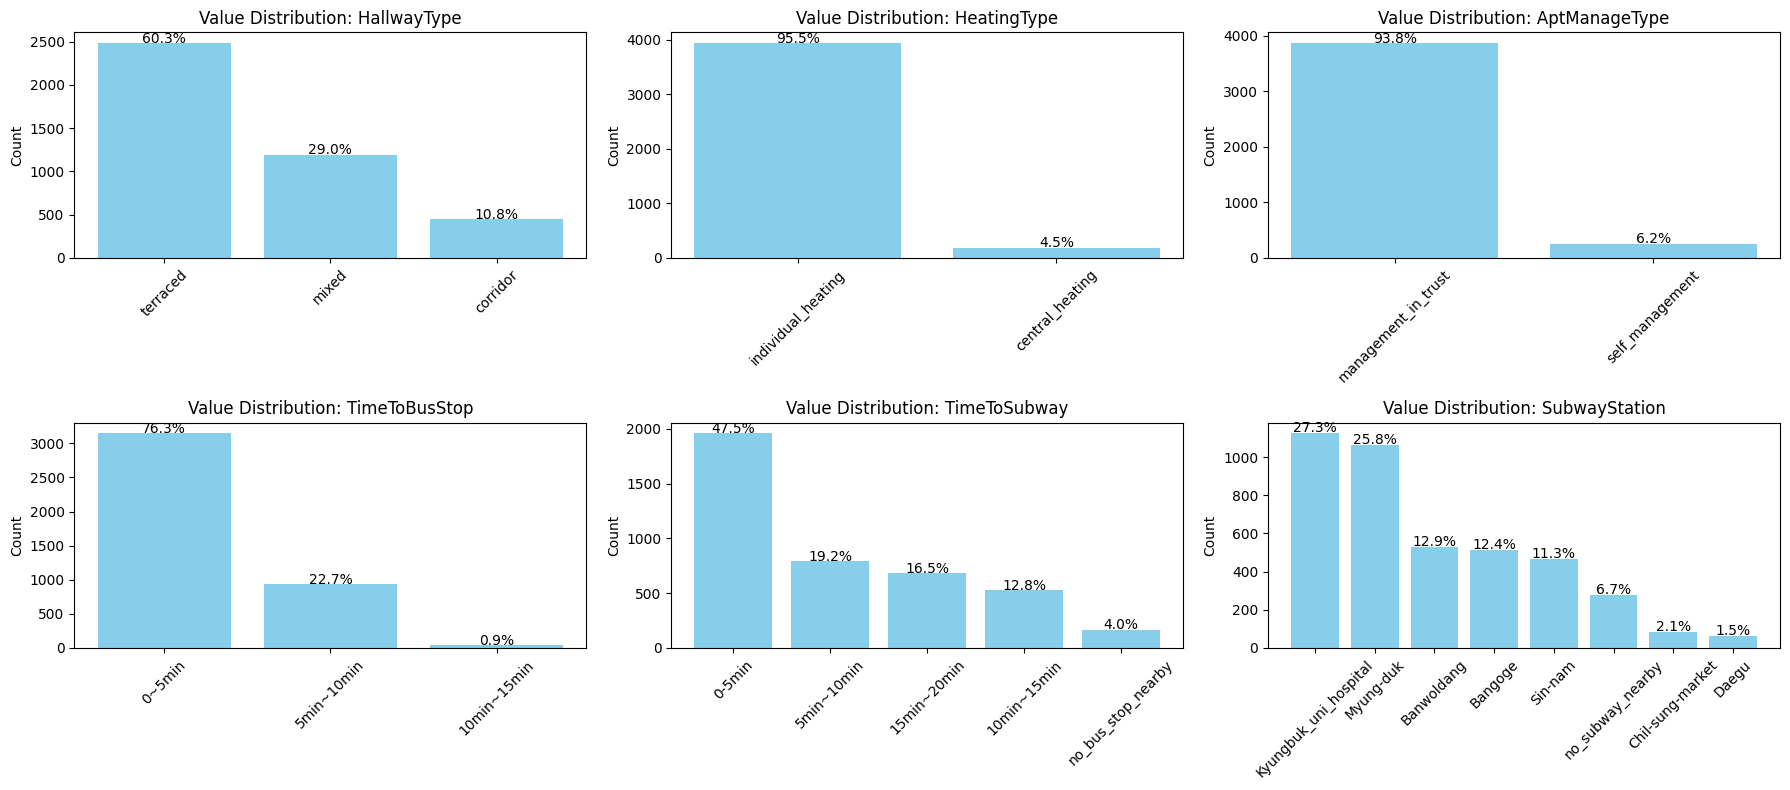

In [31]:
plot_categorical_distributions(train_data)

### Analysis of Continuous Variables

In [32]:
def plot_continuous_distributions(df):
    import matplotlib.pyplot as plt
    import pandas as pd
    
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numerical_columns)
    
    n_rows = (n_cols + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4 * n_rows))
    axes = axes.flatten() if n_cols > 3 else [axes]
    
    results = []
    
    for i, col in enumerate(numerical_columns):
        if i < len(axes):
            data = df[col].dropna()
            
            axes[i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution: {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            
            results.append({
                'column': col,
                'mean': data.mean(),
                'median': data.median(),
                'std': data.std(),
                'min': data.min(),
                'max': data.max(),
                'skewness': data.skew(),
                'missing_values': df[col].isnull().sum()
            })
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return pd.DataFrame(results)

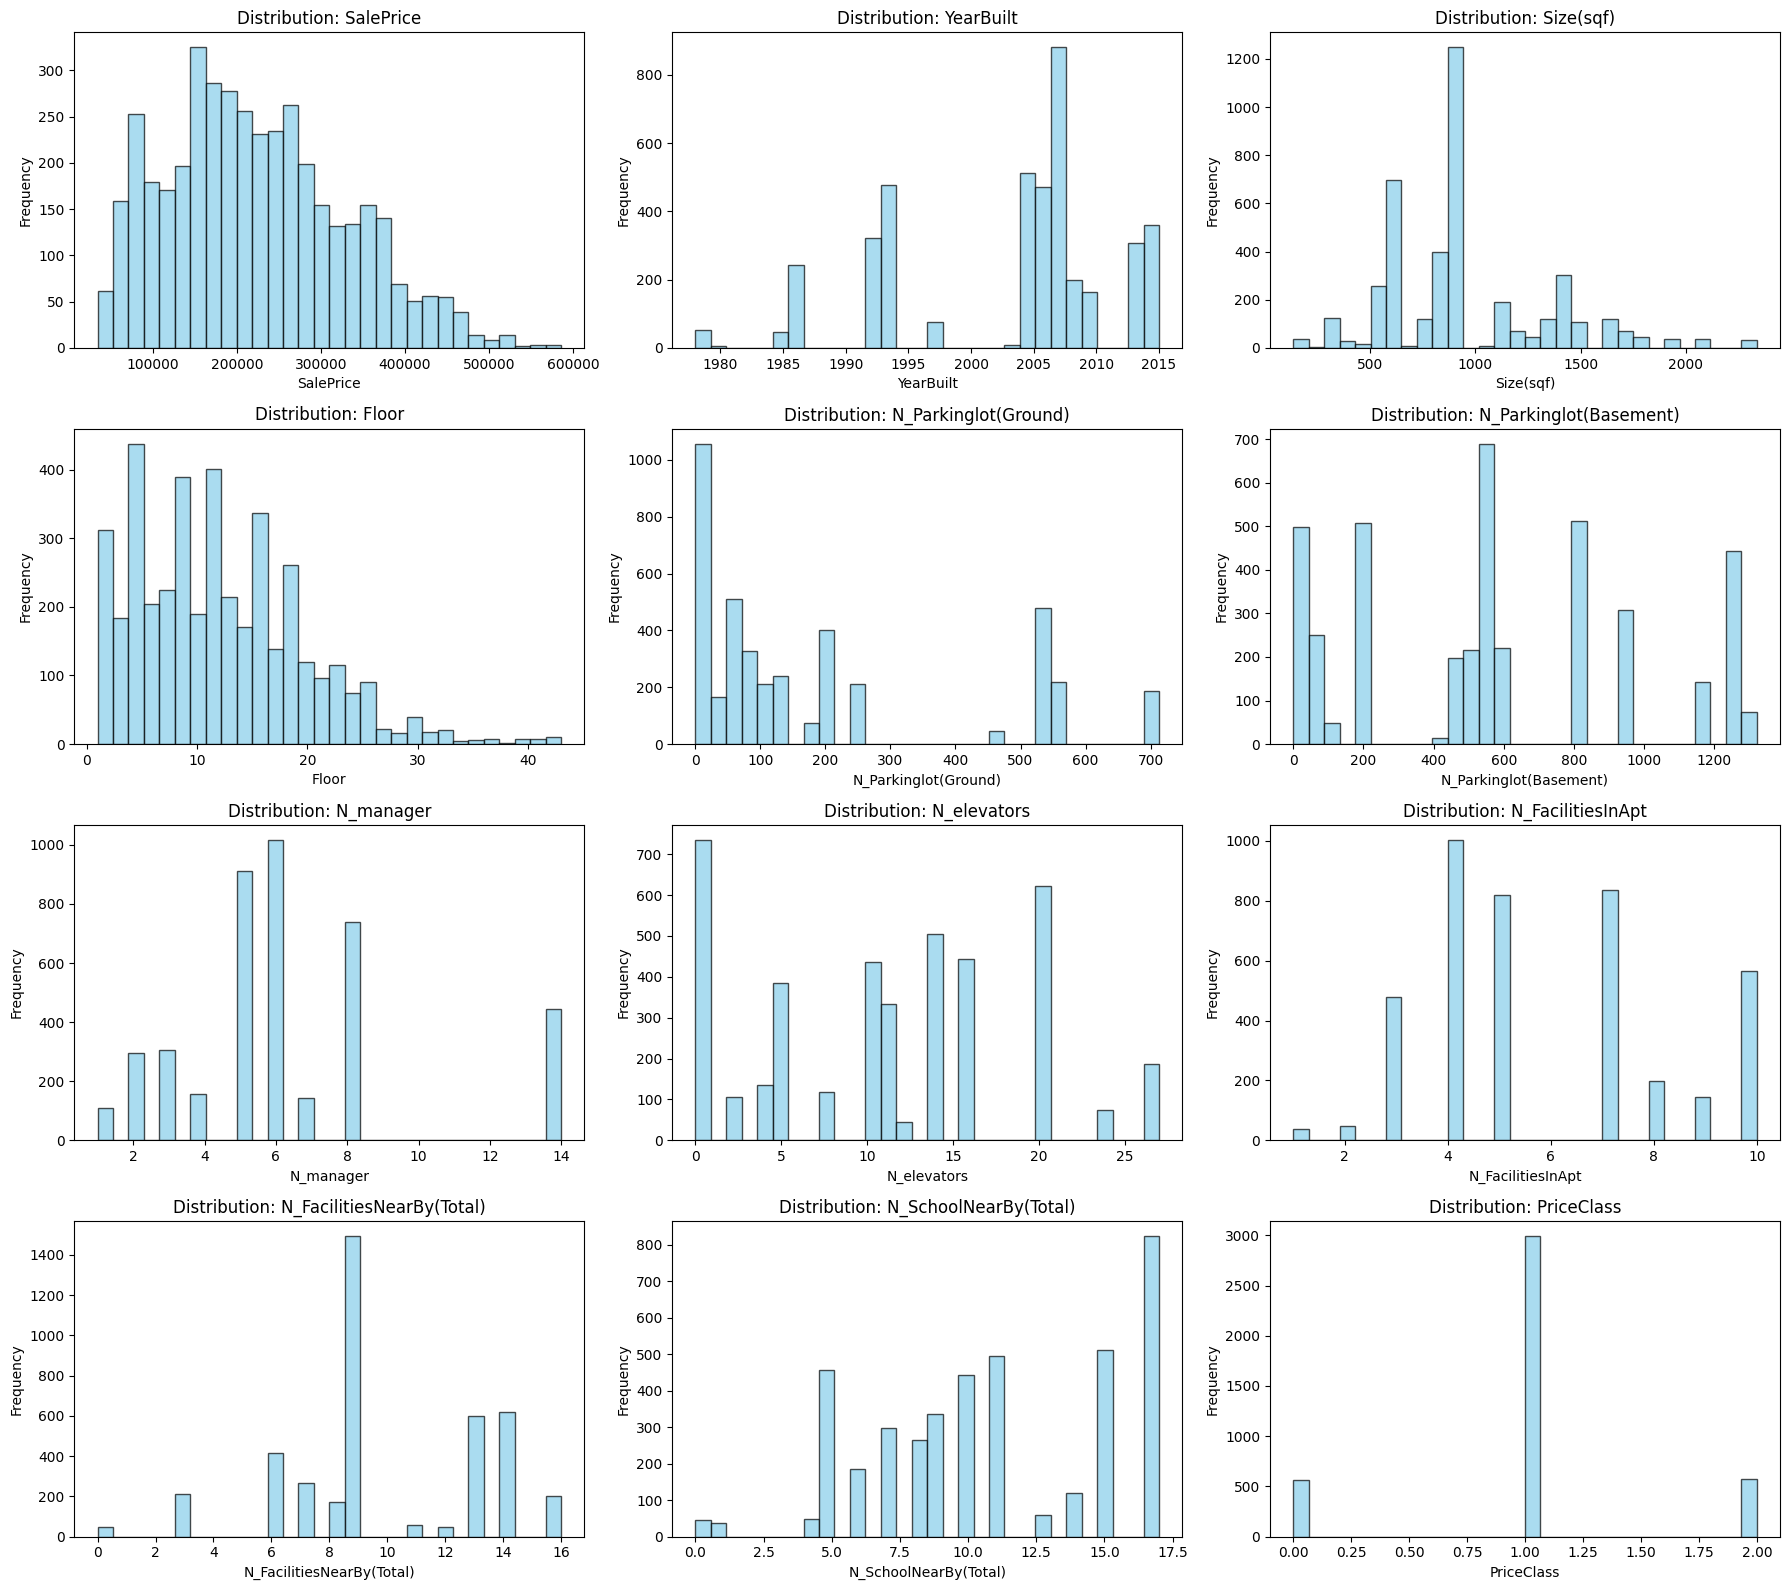

,column,mean,median,std,min,max,skewness,missing_values
0,SalePrice,222177.477207,209588.0,106325.535526,34070.0,585840.0,0.450901,0
1,YearBuilt,2002.977934,2006.0,8.765838,1978.0,2015.0,-0.816278,0
2,Size(sqf),959.958778,910.0,384.548456,135.0,2337.0,0.913792,0
3,Floor,11.994665,11.0,7.581330,1.0,43.0,0.843132,0
4,N_Parkinglot(Ground),192.789040,100.0,215.455916,0.0,713.0,1.095083,0
5,N_Parkinglot(Basement),572.857662,536.0,408.179957,0.0,1321.0,0.267607,0
6,N_manager,6.313773,6.0,3.224556,1.0,14.0,1.084654,0
7,N_elevators,11.055771,11.0,7.717030,0.0,27.0,0.114670,0
8,N_FacilitiesInApt,5.824200,5.0,2.344331,1.0,10.0,0.466668,0
9,N_FacilitiesNearBy(Total),9.860330,9.0,3.444848,0.0,16.0,-0.204620,0


In [33]:
plot_continuous_distributions(train_data)

In [34]:
def plot_correlation_matrix(df, continuous_columns=None):
   import matplotlib.pyplot as plt
   import pandas as pd
   import numpy as np
   
   if continuous_columns is None:
       continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
   
   correlation_matrix = df[continuous_columns].corr()
   
   plt.figure(figsize=(12, 10))
   plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
   
   plt.colorbar(label='Correlation coefficient')
   plt.title('Correlation Matrix of Continuous Variables')
   
   tick_marks = np.arange(len(continuous_columns))
   plt.xticks(tick_marks, continuous_columns, rotation=45, ha='right')
   plt.yticks(tick_marks, continuous_columns)
   
   for i in range(len(continuous_columns)):
       for j in range(len(continuous_columns)):
           plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                    ha='center', va='center',
                    color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')
   
   plt.tight_layout()
   plt.show()
   
   return correlation_matrix

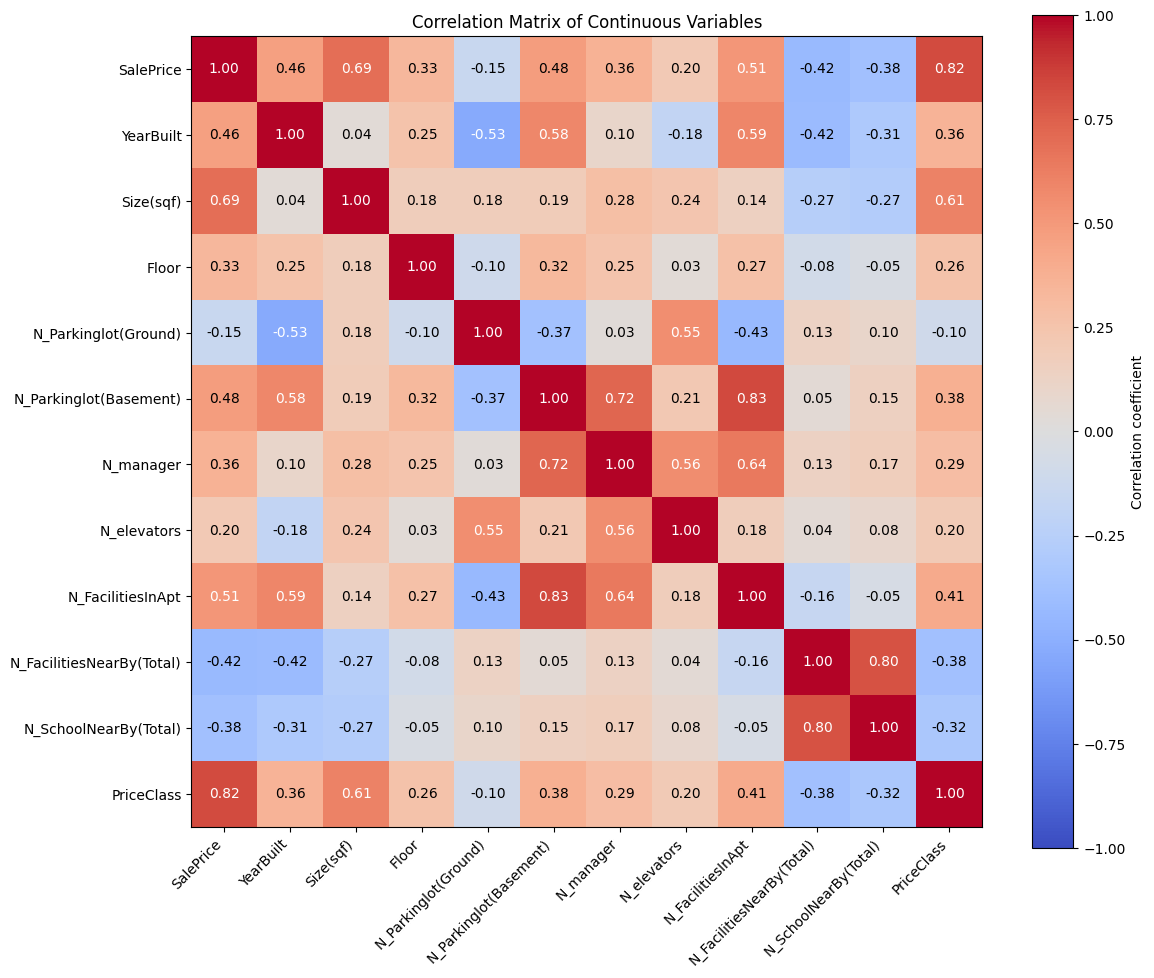

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),PriceClass
SalePrice,1.000000,0.464076,0.693545,0.331014,-0.146647,0.481596,0.360324,0.203857,0.509874,-0.421905,-0.378565,0.823550
YearBuilt,0.464076,1.000000,0.035930,0.252329,-0.525296,0.578179,0.096074,-0.183503,0.589429,-0.415147,-0.307838,0.358189
Size(sqf),0.693545,0.035930,1.000000,0.179384,0.177012,0.185165,0.284511,0.240307,0.142617,-0.265129,-0.274180,0.608283
Floor,0.331014,0.252329,0.179384,1.000000,-0.102984,0.324715,0.249085,0.032863,0.267542,-0.080072,-0.046518,0.262482
N_Parkinglot(Ground),-0.146647,-0.525296,0.177012,-0.102984,1.000000,-0.373268,0.027874,0.553496,-0.432389,0.127498,0.095235,-0.096109
N_Parkinglot(Basement),0.481596,0.578179,0.185165,0.324715,-0.373268,1.000000,0.719644,0.214240,0.834618,0.046104,0.145188,0.382461
N_manager,0.360324,0.096074,0.284511,0.249085,0.027874,0.719644,1.000000,0.557735,0.644404,0.134889,0.168151,0.292769
N_elevators,0.203857,-0.183503,0.240307,0.032863,0.553496,0.214240,0.557735,1.000000,0.178943,0.042116,0.083271,0.196355
N_FacilitiesInApt,0.509874,0.589429,0.142617,0.267542,-0.432389,0.834618,0.644404,0.178943,1.000000,-0.156660,-0.052724,0.407614
N_FacilitiesNearBy(Total),-0.421905,-0.415147,-0.265129,-0.080072,0.127498,0.046104,0.134889,0.042116,-0.156660,1.000000,0.803210,-0.380789


In [35]:
plot_correlation_matrix(train_data)